#### Dataset: Twitter, Model: Naive Bayes.

In [1]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from normalizer import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from results import ModelEvaluation

    Load the data

In [2]:
data = pd.read_csv("../dataset/TwitterDataset.txt", sep="\t")

    Let's describe the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39779 entries, 0 to 39778
Data columns (total 3 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   TrainSen                                                                                                                        39779 non-null  object
 1   0                                                                                                                               39779 non-null  int64 
 2   @0430yes i hope youre lurking rn. i want to listen to hallucination & wanna love you again live someday, pretty please?! 😭 😭 😭  39779 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.4+ KB


    There are no column names let's provide column names.

In [4]:
data.columns = ["sample_type", "label", "text"] #changes column names of the dataset.
data = data.drop(columns=["sample_type"]) #drop the redudant column.
data = data.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39779 entries, 0 to 39778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   39779 non-null  int64 
 1   text    39779 non-null  object
dtypes: int64(1), object(1)
memory usage: 621.7+ KB


In [6]:
data.head(10)

,label,text
0,0,Now Playing : With All I Am I will worship you...
1,1,in 1st grade I was dry humping all the girls. ...
2,0,Momo was so pretty at her baby shower 😍‼️
3,0,It's Friday.. I should just sleep my problems ...
4,1,*Texting a new person *Them : send me a pictur...
5,0,Prepare for miracles : Daily powerful prayers ...
6,1,@Maryy_Bennettt i love her so much. i miss her...
7,0,My feelings show Love is crazy Pretty baby Tak...
8,0,@PG_Figy @PG_Scorch I'd be down for tomorrow. ...
9,1,"If you don't have Peace at home, something is ..."


    Initialize the Normalizer module.

In [7]:
normarlizer = Normalizer()

    Get sparse matrix representation of the text:

In [8]:
matrix = normarlizer.vectorize(pd.DataFrame({"text": data["text"]}))

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.


    Let's look at the matrix:

In [9]:
matrix

<39779x34294 sparse matrix of type '<class 'numpy.float64'>'
	with 569221 stored elements in Compressed Sparse Row format>

    Let's hold out some data for testing.

In [10]:
y = data["label"]
X = matrix.toarray()
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    Let's now fit a Naive Bayes model to this:

In [11]:
NB = MultinomialNB()

In [12]:
NB = NB.fit(X_train, y_train)

    Let's test the NB model:

In [13]:
y_pred = NB.predict(X_test)
results = ModelEvaluation()

In [14]:
results.classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      4291
           1       0.81      0.91      0.85      3665

    accuracy                           0.86      7956
   macro avg       0.86      0.86      0.86      7956
weighted avg       0.86      0.86      0.86      7956



    Let's look at the confusion matrix: 

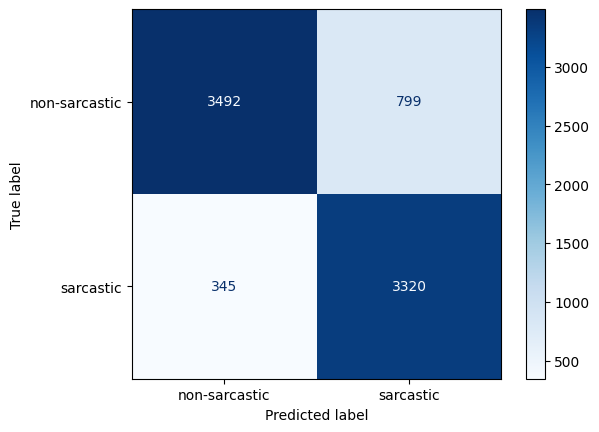

In [15]:
results.get_cm(y_true=y_test, y_pred=y_pred)

In [16]:
y_proba = NB.predict_proba(X_test)[:, 1]
y_proba[:10]

array([0.38318471, 0.65734529, 0.32605138, 0.57539516, 0.21831837,
       0.65827628, 0.54705595, 0.7171673 , 0.61668513, 0.6810307 ])

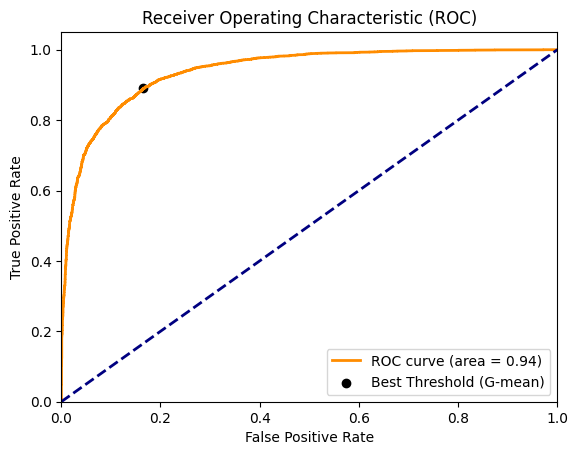

Best Threshold=0.5114


In [17]:
threshold = results.get_roc(y_true=y_test, y_scores=y_proba)

    Let's apply this best threshold to this model predictions:

In [18]:
y_pred_class = (y_proba >= threshold).astype(int)
results.classification_report(y_test, y_pred_class)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      4291
           1       0.82      0.89      0.85      3665

    accuracy                           0.86      7956
   macro avg       0.86      0.86      0.86      7956
weighted avg       0.86      0.86      0.86      7956



    There is no change in performance hence the best score is 86%

    Save the model for model persistence:

In [19]:
import joblib
joblib.dump(NB, "../TwitterDataModels/TrainedModels/NaiveBayes.joblib")

['../TwitterDataModels/TrainedModels/NaiveBayes.joblib']